In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders

In [ ]:
pip install split-folders tqdm

In [ ]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/Signature dataset/augmentation", output="/content/drive/MyDrive/Signature dataset/Train_test", seed=1337, ratio=(.8, .2), group_prefix=None) # default values


Copying files: 2887 files [11:15,  4.27 files/s]


In [ ]:
!cd /content/drive/MyDrive/Signature dataset/Train_test ####Please change your path here

/bin/bash: line 0: cd: too many arguments


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Signature dataset/Train_test'): ### Please change your path here
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_5415.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_4224.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_1732.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_9270.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_2947.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_8091.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_4722.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_3254.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_6391.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_890.jpeg
/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari/signature_0_9569.jpeg
/content/drive/MyDrive/Signature 

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
!cd /content/drive/MyDrive/Finger_Print_dataset/train_test ### ##### please Change your path here

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Signature dataset/Train_test/train'
valid_path = '/content/drive/MyDrive/Signature dataset/Train_test/val'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
glob('/content/drive/MyDrive/Signature dataset/Train_test/train/*')

['/content/drive/MyDrive/Signature dataset/Train_test/train/Srihari',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Sagar',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Pawan',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Karthik',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Vignesh',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Shubham',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Vinay',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Manoj',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Souparnika',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Prajwal',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Ashoka',
 '/content/drive/MyDrive/Signature dataset/Train_test/train/Anil']

In [ ]:
folders = glob('/content/drive/MyDrive/Signature dataset/Train_test/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Signature dataset/Train_test/train',
                                                 target_size = (224, 224),
                                                 batch_size = 15,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Signature dataset/Train_test/val',
                                            target_size = (224, 224),
                                            batch_size = 15,
                                            class_mode = 'categorical')

Found 2305 images belonging to 12 classes.
Found 582 images belonging to 12 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
len(test_set)

39

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
154/154 [==============================] - 643s 4s/step - loss: 1.2773 - accuracy: 0.6607 - val_loss: 0.0846 - val_accuracy: 0.9863
Epoch 2/25
154/154 [==============================] - 38s 246ms/step - loss: 0.0551 - accuracy: 0.9922 - val_loss: 0.0310 - val_accuracy: 0.9983
Epoch 3/25
154/154 [==============================] - 38s 245ms/step - loss: 0.0248 - accuracy: 0.9994 - val_loss: 0.0341 - val_accuracy: 0.9931
Epoch 4/25
154/154 [==============================] - 38s 245ms/step - loss: 0.0155 - accuracy: 0.9995 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 5/25
154/154 [==============================] - 38s 244ms/step - loss: 0.0099 - accuracy: 0.9998 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 6/25
154/154 [==============================] - 38s 249ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 7/25
154/154 [==============================] - 38s 244ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0065 - val_accu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


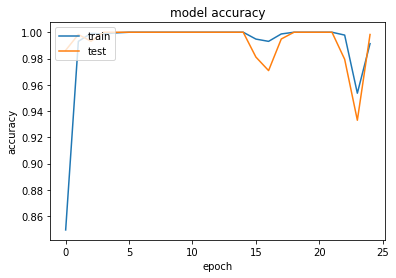

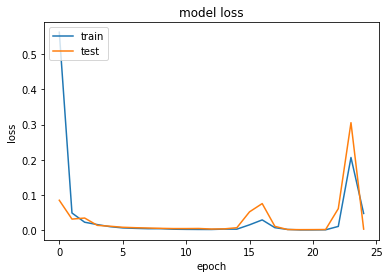

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(r.history.keys())
# summarize history for accuracy
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Signature dataset/models/accuracy') ### Change path accordingly
plt.show()

# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Signature dataset/models/loss') ### Change path accordingly
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Signature dataset/models/vgg16.h5') ##### Change path accordingly